<h1>Clustering 1000 shops on month-series sales using DTW(Dynamic Time Warping)

<li>Make a train and test data set

In [1]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
from cluster_feature import ClusterFeature # make features for clustering

In [3]:
PICKLE_FILE_NAME = './data/feature_train_data.pickle'
CF = ClusterFeature(PICKLE_FILE_NAME)
print('feature shape: {}'.format(CF.df_f_list.shape))
print('tip of a feature:\n {}'.format(CF.df_f_list.head(1)))

feature shape: (1115, 13)
tip of a feature:
    std_idx           m1           m2           m3           m4           m5  \
0        0  4703.166667  4414.192308  5067.607843  6248.857143  4754.722222   

            m6           m7           m8           m9          m10  \
0  4942.246753  4711.726027  4805.070423  4538.726027  4591.382716   

           m11          m12  
0  4326.867925  4220.882353  


In [4]:
TRAIN_SIZE = 1000
x_df = CF.df_f_list.iloc[:,1:] # Exclude a store index
X_train = np.array(x_df.iloc[0:TRAIN_SIZE,:])
X_train = np.reshape(X_train, [X_train.shape[0],12,1])
print('X_train shape: {}'.format(X_train.shape))

X_test = np.array(x_df.iloc[TRAIN_SIZE:,:])
X_test = np.reshape(X_test, [X_test.shape[0],12,1])
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (1000, 12, 1)
X_test shape: (115, 12, 1)


<li>Clustering using DTW

In [5]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
seed = 0
numpy.random.seed(seed)
# X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])  # Keep only 50 time series
# X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)  # Make time series shorter

In [6]:
n_cl = 20
print("DTW k-means")
km = TimeSeriesKMeans(n_clusters=n_cl, metric='dtw', verbose=True, random_state=seed)
# km = TimeSeriesKMeans(n_clusters=n_cl, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

DTW k-means
1635184.581 --> 1191837.112 --> 1166687.734 --> 1155695.629 --> 1142382.936 --> 1135678.399 --> 1129752.390 --> 1127186.183 --> 1124835.760 --> 1122160.563 --> 1117424.752 --> 1115638.620 --> 1114618.243 --> 1113853.754 --> 1113523.504 --> 1113362.823 --> 1113331.132 --> 1113331.132 --> 


In [7]:
def showClustering(X_feature, y_pred, n_cl, n_row, n_col,main_title ):
    plt.figure(figsize=(15,10))
    for i in range(1, n_cl+1):
        plt.subplot(n_row, n_col, i)
        plt.tight_layout()
        for xx in X_feature[y_pred == i-1]:
            title = "cluster" + str(i-1)
            plt.title(title)
            plt.plot(xx.ravel(), "g-", alpha=.2)
            plt.xlabel("Month Avg")
            plt.ylabel("Sales")
    plt.subplots_adjust(top=0.90)        
    plt.suptitle(main_title, fontsize=16)    

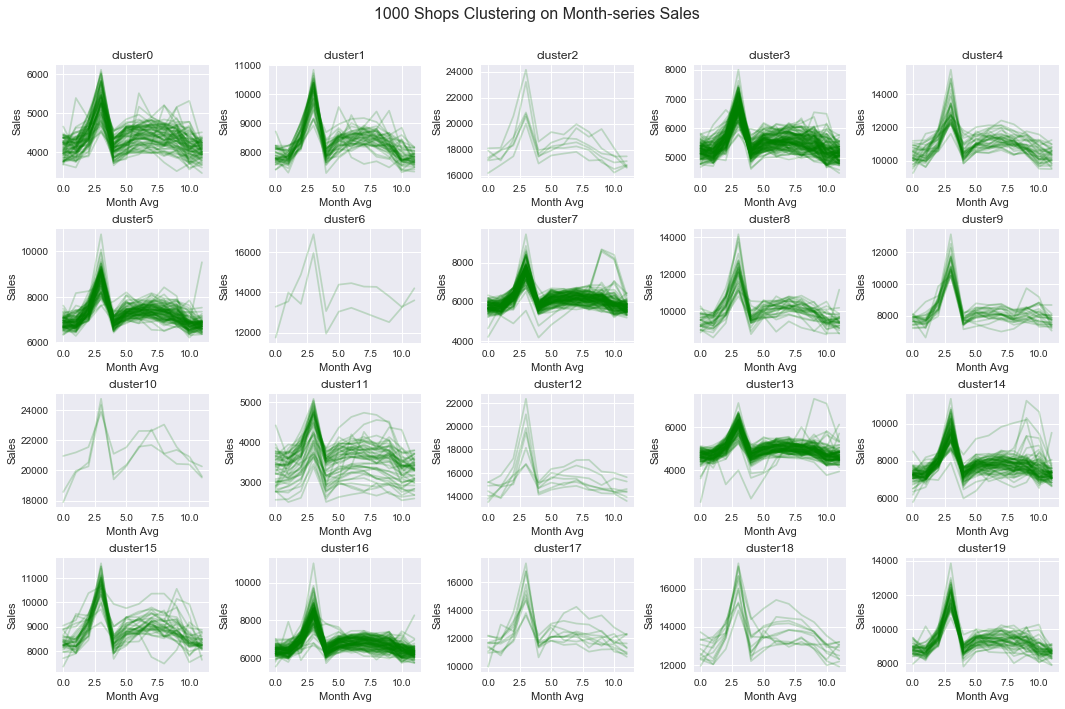

In [9]:
n_row = 4
n_col = int(n_cl / n_row)
title = '1000 Shops Clustering on Month-series Sales'
showClustering(X_train, y_pred, n_cl, n_row, n_col,title )

<li> Prediction on a period from Jan to Dec

In [10]:
t_label = km.predict(X_test)

In [11]:
print('Cluster Prediction:\n {}'.format(t_label))

Cluster Prediction:
 [ 5 11 16  3 16  1  3  5 13 17  7 15  4  7  0  4  3  3  8  7 15 19  7  3
 16 13  3  7  3 19  5  3 13 16  5 16 14  7  7  5 11  5 14 16  3  5  5 19
  7  5  5 13  7 16  9  0  0  1 16  3 14  3 14 16  3 16 13 11 14  0  5 13
 16 16 16  4  8  9 13  1  5 11 16 11  9 11 16  4 14 16 13  5  7 13  5  5
  1  8  7  9  7 16 13  3 13 16  3  3 14  0 19 16 13  0 19]


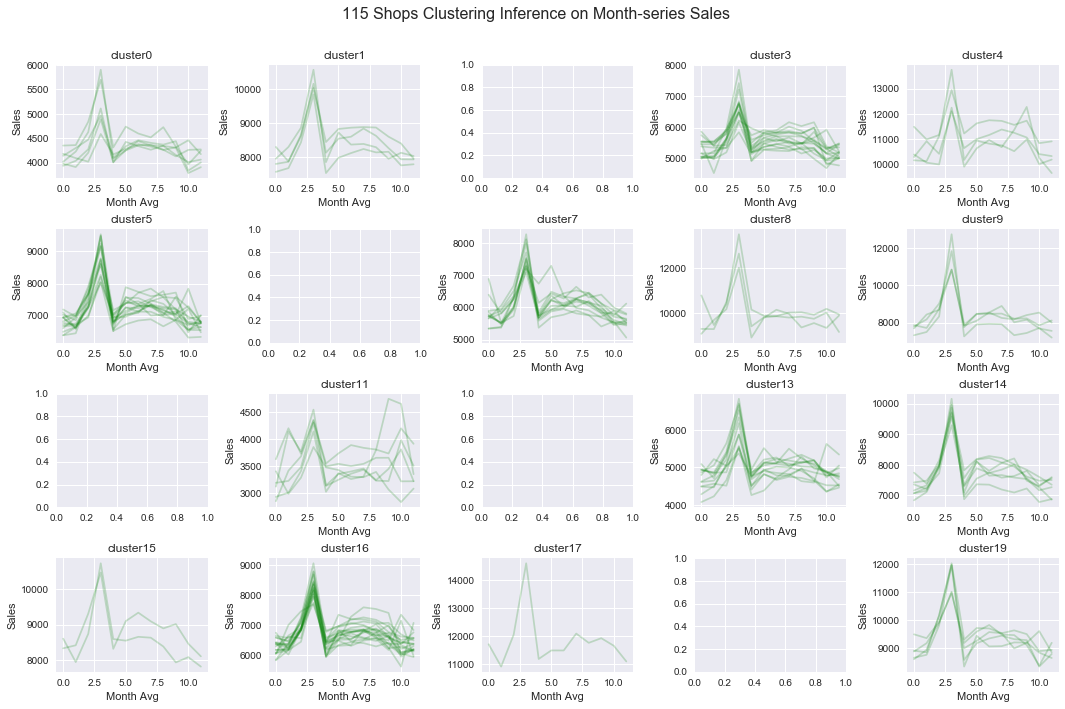

In [12]:
n_row = 4
n_col = int(n_cl / n_row)
title = '115 Shops Clustering Inference on Month-series Sales'
showClustering(X_test, t_label, n_cl, n_row, n_col,title )

<li> Prediction on a period from Jan to Nov 

In [13]:
X11_test = X_test[:,0:11,:]
print(X11_test.shape)

(115, 11, 1)


In [14]:
t11_label = km.predict(X11_test)
print('Cluster Prediction:\n {}'.format(t11_label))

Cluster Prediction:
 [ 5 11 16  3 16  1  3  5 13 17  7 15  4  7  0  4  3  3  8  7 15  8  7  3
 16 13  3  7  3 19  5  3 13 16  5 16  1  7  7  5 11  5 14 16  7  5  5 19
  7  5  5 13  7  5  9  0  0  1 16  3 14  3 14 16  3 16 13 11 14  0  5 13
 16 16 16  4  8  9 13  1  5 11 16 11  9 11 16  4 14 16 13  5  7 13  5  5
  1  8  7  9  7 16 13  3 13 16  3  3 14  0 19 16  3  0 19]


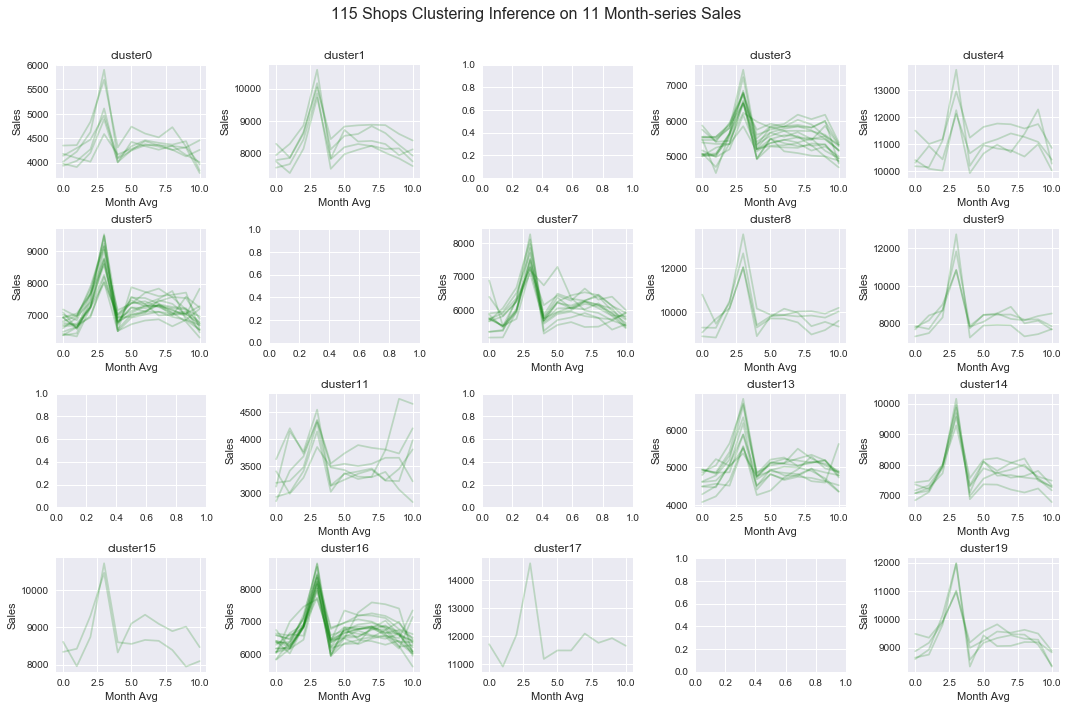

In [15]:
n_row = 4
n_col = int(n_cl / n_row)
title = '115 Shops Clustering Inference on 11 Month-series Sales'
showClustering(X11_test, t11_label, n_cl, n_row, n_col,title )

In [16]:
Ref:
    tslearn.clustering.TimeSeriesKMeans, https://tslearn.readthedocs.io/en/latest/gen_modules/clustering/tslearn.clustering.TimeSeriesKMeans.html

SyntaxError: invalid syntax (<ipython-input-16-f5ffea5a75d4>, line 1)